In [4]:
# Dependencies and Setup
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import linregress
import scipy.stats as st


In [5]:
# Load the CSV files into a Pandas DataFrames
State_and_County_df = pd.read_csv("FoodEnvironmentAtlas/StateAndCountyData.csv")
Population_by_County_df = pd.read_csv("FoodEnvironmentAtlas/SupplementalDataCounty.csv")
Variable_List_df = pd.read_csv("FoodEnvironmentAtlas/VariableList.csv")
# Filter Data to the state of Georgia and Display sample data
georgia_county_filter = State_and_County_df['State']== 'GA'
GAcounties = State_and_County_df.loc[georgia_county_filter, ['County', 'Variable_Code', 'Value']]
GA_Population_Data_df = Population_by_County_df.loc[georgia_county_filter, ['County', 'Variable_Code', 'Value']]
GA_Population_Data_df

# Look for missing values
GA_Population_Data_df.count()
GAcounties.count()


# Drop null rows
GAcounties= GAcounties.dropna(how='any')
GAcounties.count()

County           41543
Variable_Code    41543
Value            41543
dtype: int64

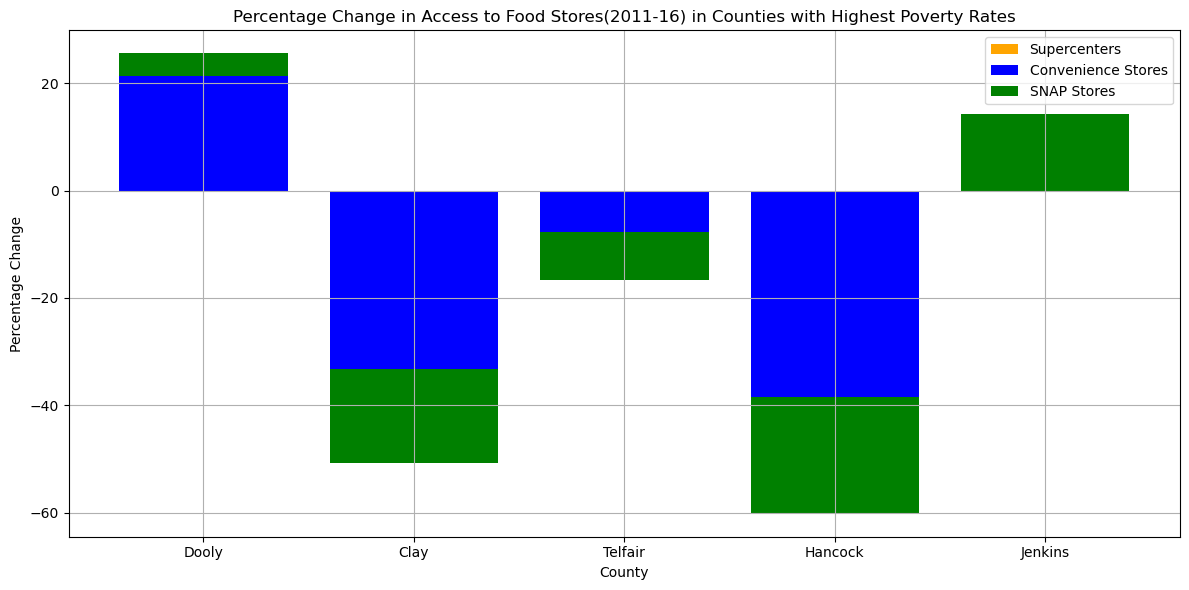

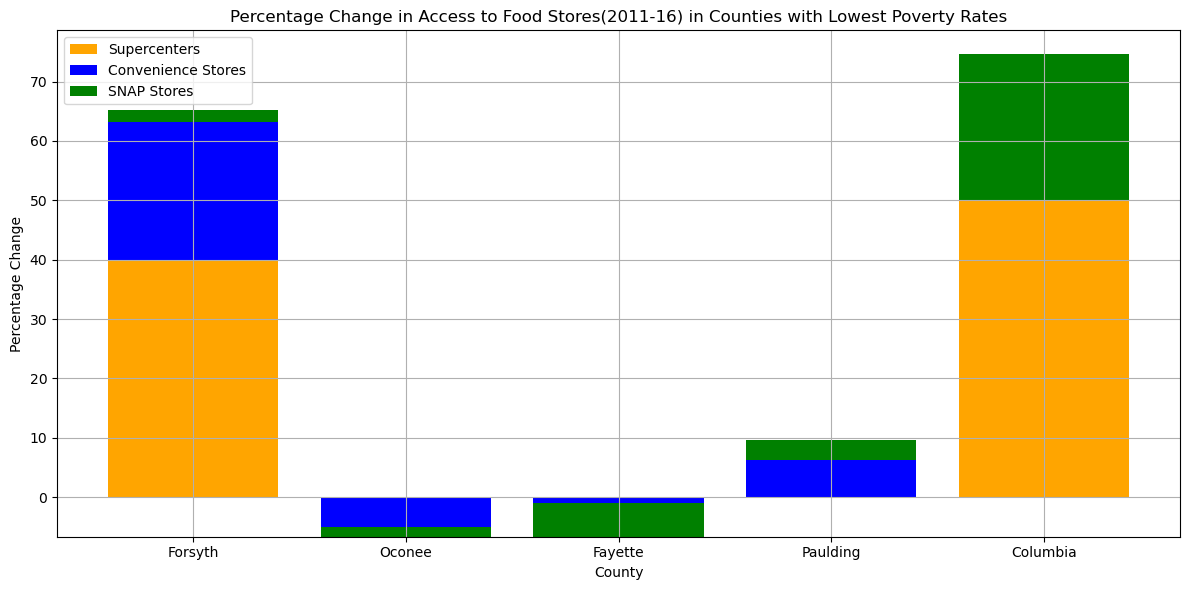

In [12]:
#My Question: Show Percentage Change in Access to Food Stores in Counties with Lowest Poverty Rates versus Counties with the highest Poverty Rates
#Supercenters & club stores (% change), 2011-16
PCT_Change_Supercenters = GAcounties[(GAcounties["Variable_Code"] =="PCH_SUPERC_11_16")]
PCT_Change_ConvenienceStores = GAcounties[(GAcounties["Variable_Code"] =="PCH_CONVS_11_16")]
PCT_Change_SNAPstores = GAcounties[(GAcounties["Variable_Code"] =="PCH_SNAPS_12_17")]
# Group by County to get the average poverty rate for each county
Poverty_Rate_15 = GAcounties[(GAcounties["Variable_Code"] == "POVRATE15")]

PCT_Change_Supercenters_by_County = PCT_Change_Supercenters.groupby('County')['Value'].mean()
PCT_Change_ConvenienceStores_by_County = PCT_Change_ConvenienceStores.groupby('County')['Value'].mean()
PCT_Change_SNAPstores_by_County = PCT_Change_SNAPstores.groupby('County')['Value'].mean()
Poverty_Rate_by_County = Poverty_Rate_15.groupby('County')['Value'].mean()

Change_in_Access_to_Food_df = pd.DataFrame({
    'Supercenters(%change)': PCT_Change_Supercenters_by_County,
    'ConvenienceStores (%change)': PCT_Change_ConvenienceStores_by_County,
    'SNAP Stores (%change)': PCT_Change_SNAPstores_by_County,
})
Change_in_Access_to_Food_df

#find highest and lowest poverty rate counties
sorted_counties = Poverty_Rate_by_County.sort_values()
Lowest_Poverty_Rate_Counties = sorted_counties.head(5)
Highest_Poverty_Rate_Counties = sorted_counties.tail(5)

Highest_PRate_Counties= ['Dooly','Clay','Telfair','Hancock','Jenkins',]
Lowest_PRate_Counties =['Forsyth', 'Oconee', 'Fayette', 'Paulding', 'Columbia']

highest_p_rate_vs_Access = Change_in_Access_to_Food_df.loc[Highest_PRate_Counties]
lowest_p_rate_vs_Access = Change_in_Access_to_Food_df.loc[Lowest_PRate_Counties]
lowest_p_rate_vs_Access

# Set up figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plotting bars for each column for counties with the highest poverty rates
ax.bar(highest_p_rate_vs_Access.index, highest_p_rate_vs_Access['Supercenters(%change)'], label='Supercenters', color='orange')
ax.bar(highest_p_rate_vs_Access.index, highest_p_rate_vs_Access['ConvenienceStores (%change)'], label='Convenience Stores', color='blue', bottom=highest_p_rate_vs_Access['Supercenters(%change)'])
ax.bar(highest_p_rate_vs_Access.index, highest_p_rate_vs_Access['SNAP Stores (%change)'], label='SNAP Stores', color='green', bottom=highest_p_rate_vs_Access['Supercenters(%change)'] + highest_p_rate_vs_Access['ConvenienceStores (%change)'])

# Adding labels and title
ax.set_xlabel('County')
ax.set_ylabel('Percentage Change')
ax.set_title('Percentage Change in Access to Food Stores(2011-16) in Counties with Highest Poverty Rates')
ax.legend()
ax.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

# Set up figure and axis for counties with the lowest poverty rates
fig, ax = plt.subplots(figsize=(12, 6))

# Plotting bars for each column for counties with the lowest poverty rates
ax.bar(lowest_p_rate_vs_Access.index, lowest_p_rate_vs_Access['Supercenters(%change)'], label='Supercenters', color='orange')
ax.bar(lowest_p_rate_vs_Access.index, lowest_p_rate_vs_Access['ConvenienceStores (%change)'], label='Convenience Stores', color='blue', bottom=lowest_p_rate_vs_Access['Supercenters(%change)'])
ax.bar(lowest_p_rate_vs_Access.index, lowest_p_rate_vs_Access['SNAP Stores (%change)'], label='SNAP Stores', color='green', bottom=lowest_p_rate_vs_Access['Supercenters(%change)'] + lowest_p_rate_vs_Access['ConvenienceStores (%change)'])

# Adding labels and title
ax.set_xlabel('County')
ax.set_ylabel('Percentage Change')
ax.set_title('Percentage Change in Access to Food Stores(2011-16) in Counties with Lowest Poverty Rates')
ax.legend()
ax.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Demographics of Population with Low Access to Stores')

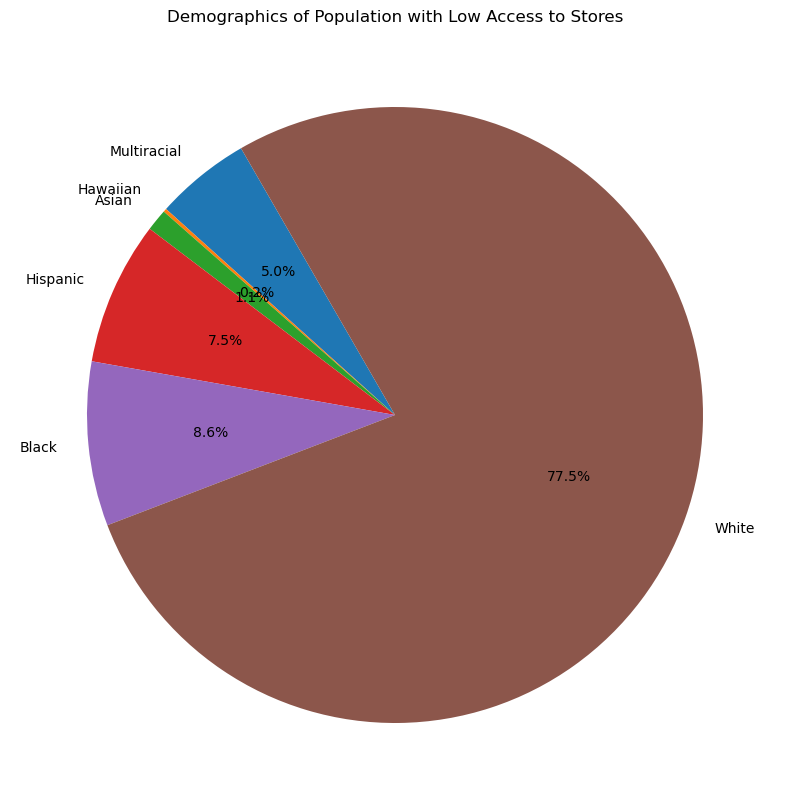

In [13]:
#Relationship in Question: Race vs. Access to Stores - show ethnicity demographics of population with low access to stores in GA
#"Multiracial, low access to store (%), 2015"
MultiracialPCT_Access= GAcounties[(GAcounties["Variable_Code"] =="PCT_LACCESS_MULTIR15")]
#"American Indian or Alaska Native, low access to store (%), 2015",Access and Proximity to Grocery Store,ACCESS,Demographics,PCT_LACCESS_NHNA15
HawaiianPCT_Access= GAcounties[(GAcounties["Variable_Code"] =="PCT_LACCESS_NHNA15")]
#"Asian, low access to store (%), 2015"
AsianPCT_Access=GAcounties[(GAcounties["Variable_Code"] =="PCT_LACCESS_NHASIAN15")]
#"Hispanic ethnicity, low access to store (%), 2015"
HispanicPCT_Access=GAcounties[(GAcounties["Variable_Code"] =="PCT_LACCESS_HISP15")]
#"Black, low access to store (%), 2015"
BlackPCT_Access=GAcounties[(GAcounties["Variable_Code"] =="PCT_LACCESS_BLACK15")]
#"White, low access to store (%), 2015"
WhitePCT_Access=GAcounties[(GAcounties["Variable_Code"] =="PCT_LACCESS_WHITE15")]

MultiracialPCT_Access_by_County =MultiracialPCT_Access.groupby('County')['Value'].mean()
HawaiianPCT_Access_by_County =HawaiianPCT_Access.groupby('County')['Value'].mean()
AsianPCT_Access_by_County =AsianPCT_Access.groupby('County')['Value'].mean()
HispanicPCT_Access_by_County =HispanicPCT_Access.groupby('County')['Value'].mean()
BlackPCT_Access_by_County =BlackPCT_Access.groupby('County')['Value'].mean()
WhitePCT_Access_by_County =WhitePCT_Access.groupby('County')['Value'].mean()

Ethnicity_Access_df = pd.DataFrame({
    'Multiracial': MultiracialPCT_Access_by_County,
    'Hawaiian': HawaiianPCT_Access_by_County,
    'Asian': AsianPCT_Access_by_County,
    'Hispanic': HispanicPCT_Access_by_County,
    'Black': BlackPCT_Access_by_County,
    'White': WhitePCT_Access_by_County
})

fig, ax = plt.subplots(figsize=(10, 10))
ax.pie(Ethnicity_Access_df.iloc[0], labels=Ethnicity_Access_df.columns, autopct='%1.1f%%', startangle=120)
ax.set_title('Demographics of Population with Low Access to Stores')

